In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
df = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/AptOnly/Dobong_Gu_Only.csv")

In [4]:
dfInfo = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/Data_Analysis/Reference.csv", 
                     index_col=0)

In [5]:
df

,kaptCode,bjdCode,Household_Num,Begin_Date,Heating_Method,House_Type,Elec_Con,Elev_Num,Park_Above,Park_Below
0,A13203302,1132010500,407,20020726.0,개별난방,아파트,단일계약,15.0,116.0,346.0
1,A13203303,1132010500,824,19861202.0,개별난방,아파트,단일계약,16.0,600.0,0.0
2,A13295201,1132010500,155,20061226.0,개별난방,아파트,단일계약,6.0,23.0,146.0
3,A13286107,1132010500,582,20020326.0,개별난방,아파트,단일계약,22.0,281.0,148.0
4,A13287801,1132010500,287,19950609.0,개별난방,아파트,단일계약,13.0,198.0,23.0
...,...,...,...,...,...,...,...,...,...,...
99,A13201001,1132010800,159,19990907.0,개별난방,아파트,단일계약,3.0,16.0,74.0
100,A13201002,1132010800,245,20021118.0,개별난방,아파트,단일계약,3.0,91.0,108.0
101,A13280104,1132010800,286,19901105.0,개별난방,아파트,단일계약,12.0,215.0,0.0
102,A10027136,1132010800,172,20160913.0,개별난방,아파트,단일계약,14.0,13.0,151.0


In [6]:
df.isnull().sum()

kaptCode          0
bjdCode           0
Household_Num     0
Begin_Date        0
Heating_Method    0
House_Type        0
Elec_Con          2
Elev_Num          3
Park_Above        2
Park_Below        2
dtype: int64

<AxesSubplot: >

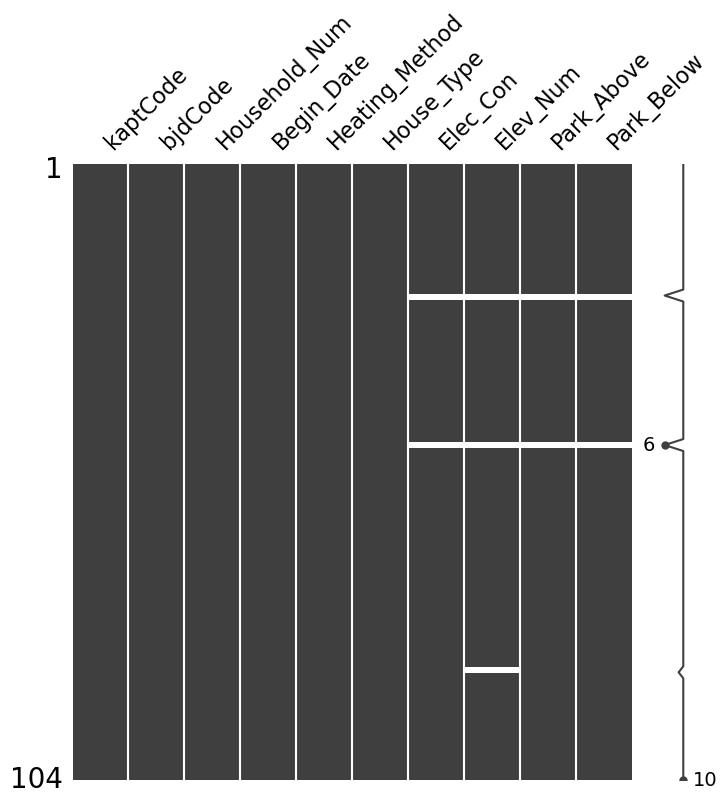

In [12]:
msno.matrix(df=df, figsize=(8, 8))

## Begin_Date

In [13]:
#null values
Begin_Date = df['Begin_Date']
print(f"There are {Begin_Date.isnull().sum()} null values, and they are located at \n{np.where(Begin_Date.isnull())[0]}")

There are 0 null values, and they are located at 
[]


In [14]:
#Drop the null values and change date values to datetime
Begin_Date = df['Begin_Date'].dropna()
Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
print(Begin_Date)

0     2002-07-26
1     1986-12-02
2     2006-12-26
3     2002-03-26
4     1995-06-09
         ...    
99    1999-09-07
100   2002-11-18
101   1990-11-05
102   2016-09-13
103   2004-10-13
Name: Begin_Date, Length: 104, dtype: datetime64[ns]


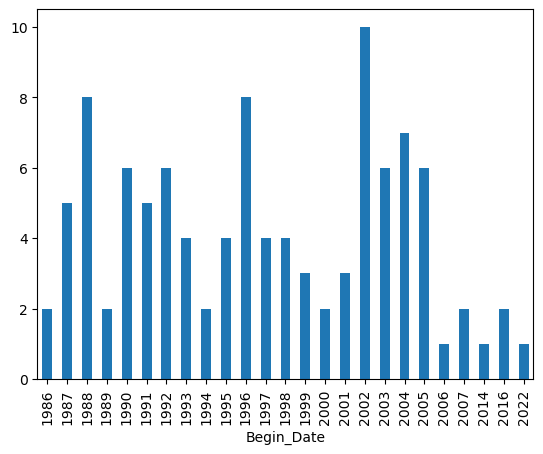

In [15]:
# distribution of years in Begin_Date
Begin_Date.groupby(Begin_Date.dt.year).count().plot(kind="bar")
plt.show()

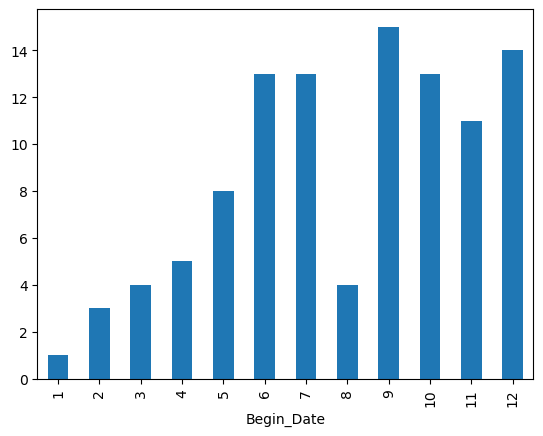

In [16]:
#Distribtion of months in Begin_Date(just for fun)
Begin_Date.groupby(Begin_Date.dt.month).count().plot(kind="bar")
plt.show()

## Household_Num

In [17]:
#1 null value
Household_Num = df['Household_Num']
print(f"There are {Household_Num.isnull().sum()} null values, and they are located at \n{np.where(Household_Num.isnull())[0]}")
display(Household_Num)

There are 0 null values, and they are located at 
[]


0      407
1      824
2      155
3      582
4      287
      ... 
99     159
100    245
101    286
102    172
103    141
Name: Household_Num, Length: 104, dtype: int64

In [18]:
Household_Num = Household_Num.dropna()
Household_Num = Household_Num.astype('int16')

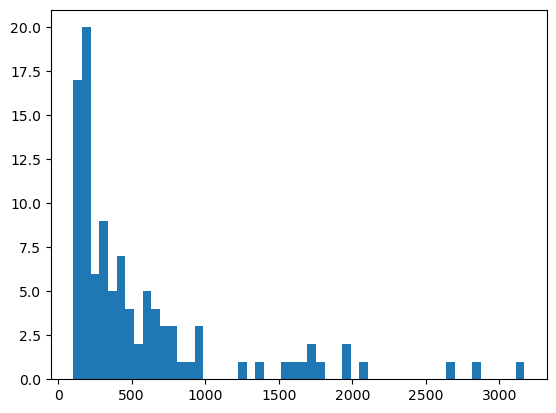

In [52]:
fig, ax = plt.subplots()
b = int(len(Household_Num)/2)
ax.hist(Household_Num, bins = b)
plt.show()

In [21]:
Household_Num.describe()

count     104.000000
mean      582.721154
std       620.079614
min       103.000000
25%       194.000000
50%       341.500000
75%       667.500000
max      3169.000000
Name: Household_Num, dtype: float64

In [22]:
def printApt (Column, df, dfInfo, maxmin = "max", ind= 0):
    if(maxmin == "max"):
        find = Column[Column == Column.max()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])
    elif(maxmin == "min"):
        find = Column[Column == Column.min()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])

In [23]:
printApt(Household_Num, df, dfInfo)

kaptCode           A13202312
bjdCode           1132010600
Household_Num           3169
Begin_Date        19861231.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                67.0
Park_Above            1603.0
Park_Below             171.0
Name: 43, dtype: object
     kaptCode Complex_Name
47  A13202312     방학신동아1단지


## Heating_Method

In [24]:
# 4 null values
Heating_Method = df['Heating_Method']
print(f"There are {Heating_Method.isnull().sum()} null values, and they are located at \n{np.where(Heating_Method.isnull())[0]}")
display(Heating_Method)

There are 0 null values, and they are located at 
[]


0      개별난방
1      개별난방
2      개별난방
3      개별난방
4      개별난방
       ... 
99     개별난방
100    개별난방
101    개별난방
102    개별난방
103    개별난방
Name: Heating_Method, Length: 104, dtype: object

In [25]:
Heating_Method = Heating_Method.dropna()

In [26]:
int_HM = pd.factorize(Heating_Method)[0]
ind_HM = pd.factorize(Heating_Method)[1]
print(int_HM)
print(ind_HM)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 2 0 1 1 1 1 0 0 0 1
 0 0 1 2 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
Index(['개별난방', '지역난방', '중앙난방'], dtype='object')


In [27]:
count_int_HM = pd.Series(int_HM).value_counts()
count_int_HM

0    91
1     9
2     4
dtype: int64

In [28]:
eng_ind_HM = ['Individual', 'Regional', 'Central']

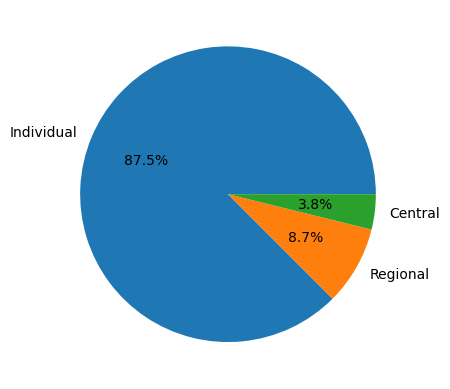

In [29]:
fig, ax = plt.subplots()
ax.pie(count_int_HM, labels=eng_ind_HM, autopct='%1.1f%%')
plt.show()

## Elev_Num; Elevator Number

In [30]:
Elev_Num = df['Elev_Num']
print(f"There are {Elev_Num.isnull().sum()} null values, and they are located at \n{np.where(Elev_Num.isnull())[0]}")

There are 3 null values, and they are located at 
[22 47 85]


In [31]:
Elev_Num = Elev_Num.dropna()
Elev_Num = Elev_Num.astype('int16')

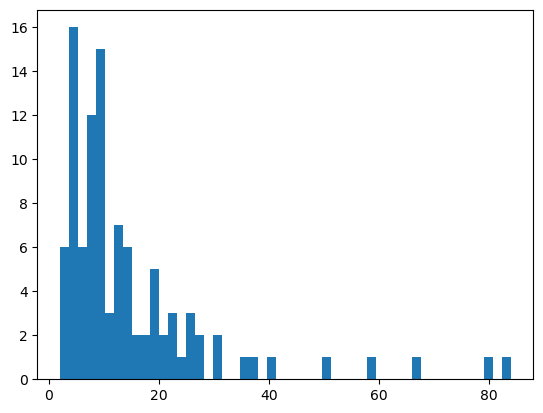

In [53]:
fig, ax = plt.subplots()
b = int(len(Elev_Num)/2)
ax.hist(Elev_Num, bins = b)
plt.show()

In [34]:
Elev_Num.describe()

count    101.000000
mean      14.851485
std       14.974903
min        2.000000
25%        6.000000
50%        9.000000
75%       19.000000
max       84.000000
Name: Elev_Num, dtype: float64

In [35]:
printApt(Elev_Num, df, dfInfo)

kaptCode           A13204103
bjdCode           1132010700
Household_Num           1668
Begin_Date        19920731.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                84.0
Park_Above             727.0
Park_Below             525.0
Name: 76, dtype: object
     kaptCode Complex_Name
81  A13204103         창동삼성


## Electricity Contract; Elec_Con

In [36]:
Elec_Con = df['Elec_Con']
print(f"There are {Elec_Con.isnull().sum()} null values, and they are located at \n{np.where(Elec_Con.isnull())[0]}")

There are 2 null values, and they are located at 
[22 47]


In [37]:
Elec_Con = Elec_Con.dropna()

In [38]:
int_EC = pd.factorize(Elec_Con)[0]
ind_EC = pd.factorize(Elec_Con)[1]
print(int_EC)
print(ind_EC)

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 2 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Index(['단일계약', '종합계약', '기타'], dtype='object')


In [39]:
count_int_EC = pd.Series(int_EC).value_counts()
count_int_EC

0    83
1    18
2     1
dtype: int64

In [40]:
eng_ind_EC = ['Single', 'Comprehensive', 'Other']

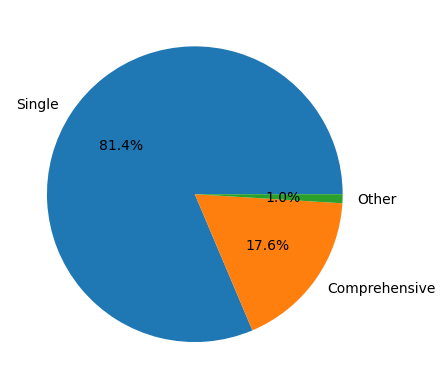

In [41]:
fig, ax = plt.subplots()
ax.pie(count_int_EC, labels=eng_ind_EC, autopct='%1.1f%%')
plt.show()

## Park_Above & Park_Below

In [42]:
Park_Above = df['Park_Above']
Park_Below = df['Park_Below']
print(f"There are {Park_Above.isnull().sum()} null values, and they are located at \n{np.where(Park_Above.isnull())[0]}")
print(f"There are {Park_Below.isnull().sum()} null values, and they are located at \n{np.where(Park_Below.isnull())[0]}")

There are 2 null values, and they are located at 
[22 47]
There are 2 null values, and they are located at 
[22 47]


In [43]:
Park_Above = Park_Above.dropna().astype('int16')
Park_Below = Park_Below.dropna().astype('int16')
display(Park_Above)
display(Park_Below)

0      116
1      600
2       23
3      281
4      198
      ... 
99      16
100     91
101    215
102     13
103     50
Name: Park_Above, Length: 102, dtype: int16

0      346
1        0
2      146
3      148
4       23
      ... 
99      74
100    108
101      0
102    151
103    111
Name: Park_Below, Length: 102, dtype: int16

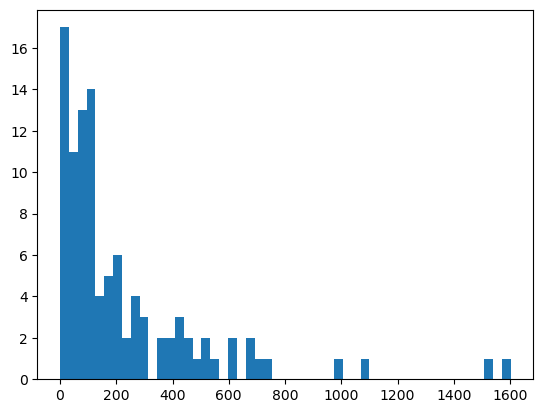

In [54]:
fig, ax = plt.subplots()
b = int(len(Park_Above)/2)
ax.hist(Park_Above, bins = b)
plt.show()

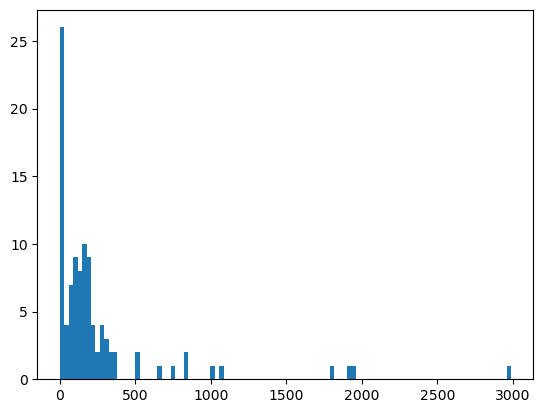

In [55]:
fig, ax = plt.subplots()
b = int(len(Park_Below/2))
ax.hist(Park_Below, bins = b)
plt.show()

In [46]:
Park_Above.describe()

count     102.000000
mean      228.362745
std       288.144449
min         0.000000
25%        55.500000
50%       116.500000
75%       302.750000
max      1603.000000
Name: Park_Above, dtype: float64

In [47]:
Park_Below.describe()

count     102.000000
mean      251.274510
std       450.726897
min         0.000000
25%        28.500000
50%       134.000000
75%       225.750000
max      2988.000000
Name: Park_Below, dtype: float64

In [48]:
printApt(Park_Above, df, dfInfo)

kaptCode           A13202312
bjdCode           1132010600
Household_Num           3169
Begin_Date        19861231.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                67.0
Park_Above            1603.0
Park_Below             171.0
Name: 43, dtype: object
     kaptCode Complex_Name
47  A13202312     방학신동아1단지


In [49]:
printApt(Park_Below, df, dfInfo)

kaptCode           A13204510
bjdCode           1132010700
Household_Num           2061
Begin_Date        20040730.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num                50.0
Park_Above             222.0
Park_Below            2988.0
Name: 57, dtype: object
     kaptCode Complex_Name
62  A13204510    창동북한산아이파크
